# Figure 1: The ActiveDROPS platform enables high-throughput characterization of kinesin motor dynamics

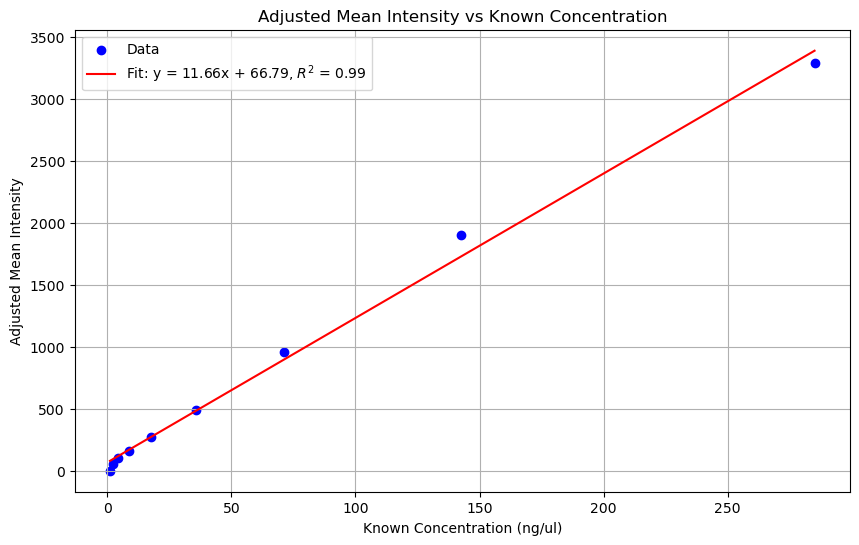

In [68]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# List of directories in the base path
base_path = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/021425-calibration-yfp/2p5ulTMB-1ulYFP_/"

# Get a list of subdirectories in the base path, excluding 'output_data' and sorting the list
conditions = sorted([d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d)) and d != 'output_data'])

# Initialize lists to store concentrations and mean intensities
concentrations = []
mean_intensities = []

# Known concentrations in ng/ul (serial 1:1 dilutions starting from 285 ng/ul)
known_concentrations = [285 / (2 ** i) for i in range(len(conditions))]

# Iterate over each condition
for condition, concentration in zip(conditions, known_concentrations):
    # Define the path to the images for the current condition
    image_path = f"{base_path}/{condition}/Rep1/original/*[Gg][Ff][Pp]*.tif"
    
    # Get a list of all image files
    image_files = sorted(glob.glob(image_path))
    if image_files:
        # Calculate the mean intensity for all images in the condition
        total_intensity = 0
        for image_file in image_files:
            with Image.open(image_file) as img:
                img_array = np.array(img)
                total_intensity += img_array.mean()
        mean_intensity = total_intensity / len(image_files)
        
        # Append the mean intensity and concentration to the lists
        mean_intensities.append(mean_intensity)
        concentrations.append(concentration)

# Use the mean intensity of the last condition as blank and subtract it from the other measurements
blank_intensity = mean_intensities[-1]
adjusted_mean_intensities = [intensity - blank_intensity for intensity in mean_intensities]

# Create a DataFrame from the conditions, known concentrations, and adjusted mean intensities
data = {
    'Condition': conditions,
    'Known Concentration (ng/ul)': known_concentrations,
    'Adjusted Mean Intensity': adjusted_mean_intensities
}
df = pd.DataFrame(data)

# Convert lists to numpy arrays for linear regression
X = np.array(concentrations).reshape(-1, 1)
y = np.array(adjusted_mean_intensities)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Calculate slope, intercept, and R-squared
slope = model.coef_[0]
intercept = model.intercept_
r_squared = r2_score(y, y_pred)

# Calculate predicted concentrations using the linear model
predicted_concentrations = (df['Adjusted Mean Intensity'] - intercept) / slope

# Add predicted concentrations to the DataFrame
df['Predicted Concentration (ng/ul)'] = predicted_concentrations

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(df['Known Concentration (ng/ul)'], df['Adjusted Mean Intensity'], color='blue', label='Data')
plt.plot(df['Known Concentration (ng/ul)'], y_pred, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}, $R^2$ = {r_squared:.2f}')
plt.xlabel('Known Concentration (ng/ul)')
plt.ylabel('Adjusted Mean Intensity')
plt.title('Adjusted Mean Intensity vs Known Concentration')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
df

,Condition,Known Concentration (ng/ul),Adjusted Mean Intensity,Predicted Concentration (ng/ul)
0,1,285.000000,3287.277047,276.279369
1,2,142.500000,1900.268587,157.290756
2,3,71.250000,959.452226,76.580048
3,4,35.625000,491.774784,36.458959
4,5,17.812500,270.724404,17.495499
5,6,8.906250,162.475324,8.209033
6,7,4.453125,105.299800,3.304062
7,8,2.226562,55.110055,-1.001614
8,9,1.113281,0.000000,-5.729392


In [70]:
import pandas as pd
import numpy as np
from PIL import Image
import glob
import os

# Define the path to the images
image_path = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/100624-kif3-titration-RT/2p5ulTMB-1ulDNAXnM_/Kif3_160nM_1-RT/Rep1/original/*[Gg][Ff][Pp]*.tif"

# Get a list of all image files
image_files = sorted(glob.glob(image_path))[::50]

# Initialize lists to store frame numbers, mean intensities, and file names
frames = []
mean_intensities = []
file_names = []

# Iterate over each image file
for i, image_file in enumerate(image_files):
    # Open the image
    with Image.open(image_file) as img:
        # Convert image to numpy array
        img_array = np.array(img)
        # Calculate the mean intensity
        mean_intensity = img_array.mean()
        # Append the frame number, mean intensity, and file name to the lists
        frames.append(i)
        mean_intensities.append(mean_intensity)
        file_names.append(os.path.basename(image_file))

# Calculate predicted protein concentrations using the slope and intercept

predicted_concentrations = (np.array(mean_intensities) - intercept) / slope

# Create a DataFrame with the specified column order and add predicted concentrations
df_kif3 = pd.DataFrame({
    'frame': frames,
    'file_name': file_names,
    'mean_intensity': mean_intensities,
    'predicted_concentration': predicted_concentrations
})

df_kif3

UnidentifiedImageError: cannot identify image file '../../../../Thomson Lab Dropbox/David Larios/activedrops/main/100624-kif3-titration-RT/2p5ulTMB-1ulDNAXnM_/Kif3_160nM_1-RT/Rep1/original/img_000000000_4x_GFP_000.tif'

In [64]:
import pandas as pd
import numpy as np
from PIL import Image
import glob
import os

# Define the path to the images
image_path = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/101324-k401-titration-rt/2p5TMB-1ulDNA_/K401_160nM-RT/Rep1/original/*[Gg][Ff][Pp]*.tif"

# Get a list of all image files
image_files = sorted(glob.glob(image_path))[::50]

# Initialize lists to store frame numbers, mean intensities, and file names
frames = []
mean_intensities = []
file_names = []

# Iterate over each image file
for i, image_file in enumerate(image_files):
    # Open the image
    with Image.open(image_file) as img:
        # Convert image to numpy array
        img_array = np.array(img)
        # Calculate the mean intensity
        mean_intensity = img_array.mean()
        # Append the frame number, mean intensity, and file name to the lists
        frames.append(i)
        mean_intensities.append(mean_intensity)
        file_names.append(os.path.basename(image_file))

# Calculate predicted protein concentrations using the slope and intercept

predicted_concentrations = (np.array(mean_intensities) - intercept) / slope

# Create a DataFrame with the specified column order and add predicted concentrations
df_k401 = pd.DataFrame({
    'frame': frames,
    'file_name': file_names,
    'mean_intensity': mean_intensities,
    'predicted_concentration': predicted_concentrations
})

df_k401

,frame,file_name,mean_intensity,predicted_concentration
0,0,img_000000000_4x_GFP.tif,171.346102,8.854245
1,1,img_000000050_4x_GFP.tif,178.488749,9.465415
2,2,img_000000100_4x_GFP.tif,185.046045,10.026498
3,3,img_000000150_4x_GFP.tif,190.863133,10.524245
4,4,img_000000200_4x_GFP.tif,196.396381,10.997704
5,5,img_000000250_4x_GFP.tif,202.556030,11.524762
6,6,img_000000300_4x_GFP.tif,208.917824,12.069117
7,7,img_000000350_4x_GFP.tif,215.248904,12.610843
8,8,img_000000400_4x_GFP.tif,222.410212,13.223609
9,9,img_000000450_4x_GFP.tif,229.607742,13.839475


,frame,file_name,mean_intensity,predicted_concentration
0,0,img_000000000_4x_GFP.tif,171.346102,8.854245
1,1,img_000000050_4x_GFP.tif,178.488749,9.465415
2,2,img_000000100_4x_GFP.tif,185.046045,10.026498
3,3,img_000000150_4x_GFP.tif,190.863133,10.524245
4,4,img_000000200_4x_GFP.tif,196.396381,10.997704
5,5,img_000000250_4x_GFP.tif,202.556030,11.524762
6,6,img_000000300_4x_GFP.tif,208.917824,12.069117
7,7,img_000000350_4x_GFP.tif,215.248904,12.610843
8,8,img_000000400_4x_GFP.tif,222.410212,13.223609
9,9,img_000000450_4x_GFP.tif,229.607742,13.839475


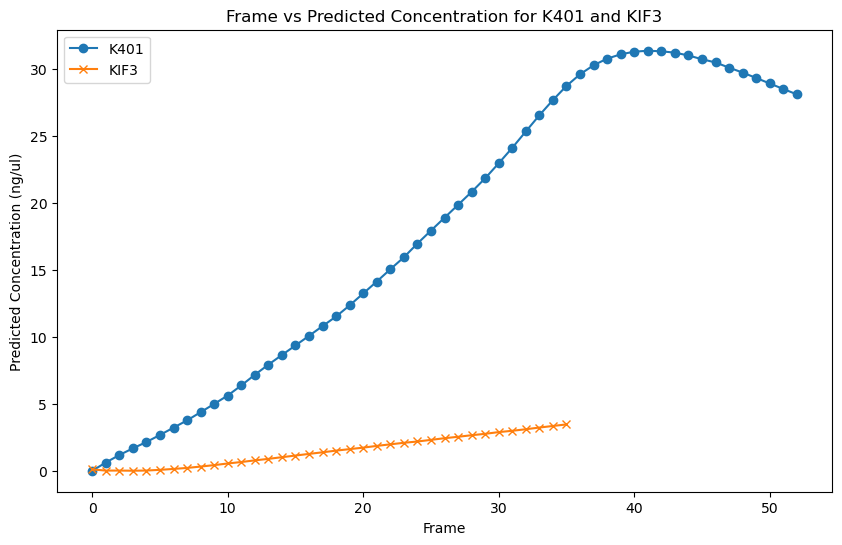

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_kif3 is already defined in the notebook
# Subtract the minimum value from predicted concentrations
df_k401['predicted_concentration'] -= df_k401['predicted_concentration'].min()
df_kif3['predicted_concentration'] -= df_kif3['predicted_concentration'].min()

# Plotting df_k401 and df_kif3 frames vs predicted concentration
plt.figure(figsize=(10, 6))

# Plot df_k401
plt.plot(df_k401['frame'], df_k401['predicted_concentration'], label='K401', marker='o')

# Plot df_kif3
plt.plot(df_kif3['frame'], df_kif3['predicted_concentration'], label='KIF3', marker='x')

# Adding labels and title
plt.xlabel('Frame')
plt.ylabel('Predicted Concentration (ng/ul)')
plt.title('Frame vs Predicted Concentration for K401 and KIF3')
plt.legend()

# Show the plot
plt.show()


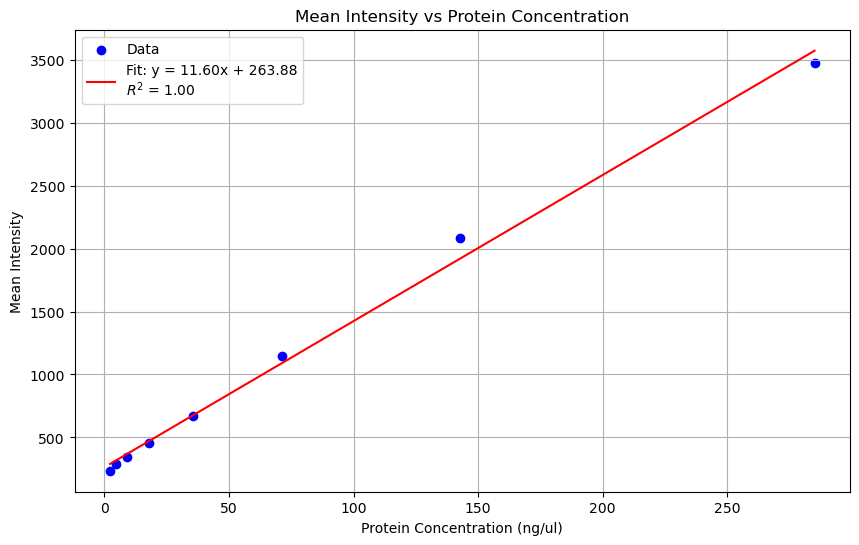

Slope: 11.60
Intercept: 263.88
R² = 1.00
ss_residual: 44466.01441456071
ss_total: 9200826.40863617
Predicted Values: [3570.94839905 1917.41175953 1090.64343978  677.2592799   470.56719996
  367.22115999  315.54814     289.71163001]


In [29]:
# Base path to the conditions
base_path = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/021425-calibration-yfp/2p5ulTMB-1ulYFP_"

# List of condition folders
conditions = ['1', '2', '3', '4', '5', '6', '7', '8']

# Initialize lists to store concentrations and mean intensities
concentrations = []
mean_intensities = []

# Known concentrations in ng/ul (serial 1:1 dilutions starting from 285 ng/ul)
known_concentrations = [285 / (2 ** i) for i in range(len(conditions))]

# Iterate over each condition
for condition, concentration in zip(conditions, known_concentrations):
    # Define the path to the images for the current condition
    image_path = f"{base_path}/{condition}/Rep1/original/*[Gg][Ff][Pp]*.tif"
    
    # Get a list of all image files and select the last one
    image_files = sorted(glob.glob(image_path))
    if image_files:
        last_image_file = image_files[-1]
        
        # Open the last image
        with Image.open(last_image_file) as img:
            # Convert image to numpy array
            img_array = np.array(img)
            # Calculate the mean intensity
            mean_intensity = img_array.mean()
            # Append the mean intensity and concentration to the lists
            mean_intensities.append(mean_intensity)
            concentrations.append(concentration)

# Convert lists to numpy arrays for linear regression
X = np.array(concentrations).reshape(-1, 1)
y = np.array(mean_intensities)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Manually calculate R²
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Extract slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(concentrations, mean_intensities, color='blue', label='Data')
plt.plot(concentrations, y_pred, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.2f}')
plt.xlabel('Protein Concentration (ng/ul)')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity vs Protein Concentration')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.show()

# Print the slope, intercept, and R²
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R² = {r_squared:.2f}")

print("ss_residual:", ss_residual)
print("ss_total:", ss_total)
print("Predicted Values:", y_pred)